# Photoz correction

### calculate luminosities in IRAC and at 150MHz using photoz's

In [33]:
import numpy as np
from astropy.table import Table, hstack, join
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky
from IPython.display import clear_output
from scipy.optimize import curve_fit
import pickle
import os
import matplotlib.pyplot as plt
from pymoc import MOC

In [3]:
photoz = Table.read('../dmu24/dmu24_Lockman-SWIRE/data/master_catalogue_Lockman-SWIRE_20170710_photoz_20170802_r_and_irac1_optimised.fits')

In [4]:
lockman_data = Table.read('data/merged_lofar_masterlist_lockman-swire.fits')

In [18]:
photoz_id = photoz['help_id']
lockman_id = lockman_data['help_id']

In [23]:
sel = np.in1d(lockman_id,photoz_id)
lockman_data = lockman_data[sel]

In [24]:
sel = np.in1d(photoz_id,lockman_id)
photoz_data = photoz[sel]

In [29]:
len(photoz_data)

16833

In [30]:
merged = hstack([lockman_data,photoz_data])

In [31]:
merged[0]

Source_id,Isl_id,RA_1,E_RA,DEC_1,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,lr_i,lr_dist_i,lr_index_i,lr_i_flux,lrt,help_id_1,field,ra,dec,hp_idx,f_ap_wfc_u,ferr_ap_wfc_u,m_ap_wfc_u,merr_ap_wfc_u,f_wfc_u,ferr_wfc_u,m_wfc_u,merr_wfc_u,flag_wfc_u,f_ap_wfc_g,ferr_ap_wfc_g,m_ap_wfc_g,merr_ap_wfc_g,f_wfc_g,ferr_wfc_g,m_wfc_g,merr_wfc_g,flag_wfc_g,f_ap_wfc_r,ferr_ap_wfc_r,m_ap_wfc_r,merr_ap_wfc_r,f_wfc_r,ferr_wfc_r,m_wfc_r,merr_wfc_r,flag_wfc_r,f_ap_wfc_i,ferr_ap_wfc_i,m_ap_wfc_i,merr_ap_wfc_i,f_wfc_i,ferr_wfc_i,m_wfc_i,merr_wfc_i,flag_wfc_i,f_ap_wfc_z,ferr_ap_wfc_z,m_ap_wfc_z,merr_ap_wfc_z,f_wfc_z,ferr_wfc_z,m_wfc_z,merr_wfc_z,flag_wfc_z,f_ap_rcs_g,ferr_ap_rcs_g,m_ap_rcs_g,merr_ap_rcs_g,f_rcs_g,ferr_rcs_g,m_rcs_g,merr_rcs_g,flag_rcs_g,f_ap_rcs_r,ferr_ap_rcs_r,m_ap_rcs_r,merr_ap_rcs_r,f_rcs_r,ferr_rcs_r,m_rcs_r,merr_rcs_r,flag_rcs_r,f_ap_rcs_i,ferr_ap_rcs_i,m_ap_rcs_i,merr_ap_rcs_i,f_rcs_i,ferr_rcs_i,m_rcs_i,merr_rcs_i,flag_rcs_i,f_ap_rcs_z,ferr_ap_rcs_z,m_ap_rcs_z,merr_ap_rcs_z,f_rcs_z,ferr_rcs_z,m_rcs_z,merr_rcs_z,flag_rcs_z,f_ap_rcs_y,ferr_ap_rcs_y,m_ap_rcs_y,merr_ap_rcs_y,f_rcs_y,ferr_rcs_y,m_rcs_y,merr_rcs_y,flag_rcs_y,f_ap_gpc1_g,ferr_ap_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,m_gpc1_g,merr_gpc1_g,flag_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,m_gpc1_r,merr_gpc1_r,flag_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,m_gpc1_i,merr_gpc1_i,flag_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,m_gpc1_z,merr_gpc1_z,flag_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,m_gpc1_y,merr_gpc1_y,flag_gpc1_y,f_ap_cfht_megacam_u,ferr_ap_cfht_megacam_u,m_ap_cfht_megacam_u,merr_ap_cfht_megacam_u,f_cfht_megacam_u,ferr_cfht_megacam_u,m_cfht_megacam_u,merr_cfht_megacam_u,flag_cfht_megacam_u,f_ap_cfht_megacam_g,ferr_ap_cfht_megacam_g,m_ap_cfht_megacam_g,merr_ap_cfht_megacam_g,f_cfht_megacam_g,ferr_cfht_megacam_g,m_cfht_megacam_g,merr_cfht_megacam_g,flag_cfht_megacam_g,f_ap_cfht_megacam_r,ferr_ap_cfht_megacam_r,m_ap_cfht_megacam_r,merr_ap_cfht_megacam_r,f_cfht_megacam_r,ferr_cfht_megacam_r,m_cfht_megacam_r,merr_cfht_megacam_r,flag_cfht_megacam_r,f_ap_cfht_megacam_z,ferr_ap_cfht_megacam_z,m_ap_cfht_megacam_z,merr_ap_cfht_megacam_z,f_cfht_megacam_z,ferr_cfht_megacam_z,m_cfht_megacam_z,merr_cfht_megacam_z,flag_cfht_megacam_z,f_ap_ukidss_j,ferr_ap_ukidss_j,m_ap_ukidss_j,merr_ap_ukidss_j,f_ukidss_j,ferr_ukidss_j,m_ukidss_j,merr_ukidss_j,flag_ukidss_j,f_ap_ukidss_k,ferr_ap_ukidss_k,m_ap_ukidss_k,merr_ap_ukidss_k,f_ukidss_k,ferr_ukidss_k,m_ukidss_k,merr_ukidss_k,flag_ukidss_k,f_ap_irac3,ferr_ap_irac3,m_ap_irac3,merr_ap_irac3,f_irac3,ferr_irac3,m_irac3,merr_irac3,flag_irac3,f_ap_irac4,ferr_ap_irac4,m_ap_irac4,merr_ap_irac4,f_irac4,ferr_irac4,m_irac4,merr_irac4,flag_irac4,f_ap_irac1,ferr_ap_irac1,m_ap_irac1,merr_ap_irac1,f_irac1,ferr_irac1,m_irac1,merr_irac1,flag_irac1,f_ap_irac2,ferr_ap_irac2,m_ap_irac2,merr_ap_irac2,f_irac2,ferr_irac2,m_irac2,merr_irac2,flag_irac2,stellarity,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,help_id_2,RA_2,DEC_2,id,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,za_hb,za_eazy,zm_eazy,zpeak_eazy,chi_r_eazy,l68_eazy,u68_eazy,nfilt_eazy,za_atlas,zm_atlas,zpeak_atlas,chi_r_atlas,l68_atlas,u68_atlas,nfilt_atlas,za_cosmos,zm_cosmos,zpeak_cosmos,chi_r_cosmos,l68_cosmos,u68_cosmos,nfilt_cosmos,chi_r_stellar,stellar_type
,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg

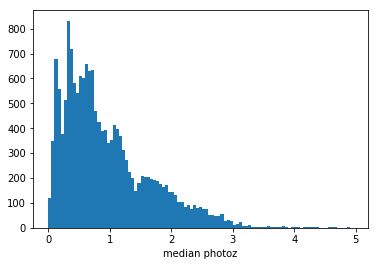

In [37]:
plt.hist(merged['z1_median'],bins=np.arange(0,5,0.05))
plt.xlabel('median photoz')
plt.show()

In [ ]:
plt